# Bar Charts
A *bar chart* depicts the distribution of a categorical variable. In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level.

For 
- Nominal data, the bars can be ordered by frequency to easily see which category is the most common.
- Ordinal data should not be re-ordered because the inherent ordering of the levels is typically more important to display.

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [42]:
# load the data
pokemon = pd.read_csv("../1. Data Files/pokemon.csv")
sales_data = pd.read_csv("../1. Data Files/sales-data.csv")

In [3]:
# pokemon's info
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


## Barcharts Plotting

Let us view the distribution of generation_id which is a categorical variable. 

In [4]:
# How many unique generations have we?
pokemon.generation_id.unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [6]:
# check the distribution of generation_ids
pokemon.generation_id.value_counts()

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

## Absolute Frequency plotting

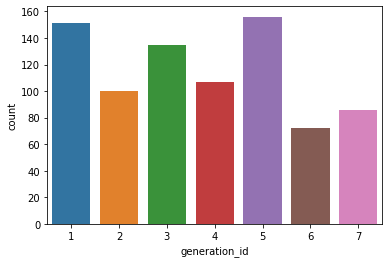

In [9]:
# plot the frequency of generation_id
sb.countplot(data=pokemon, x='generation_id');

It is advisable to use one color since the different colors in the above plot have no specific meaning.

In [10]:
sb.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

Choose any color palettes to plot a consistent plan.

<AxesSubplot:xlabel='generation_id', ylabel='count'>

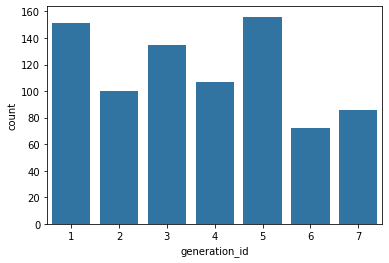

In [11]:
# choose color
base_color=sb.color_palette()[0]

#plot one consistent color
sb.countplot(data=pokemon, x='generation_id', color=base_color)

order the bar chart from largest to smallest frequency

In [12]:
# generate the indexes of the value counts
gen_order = pokemon['generation_id'].value_counts().index
gen_order

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

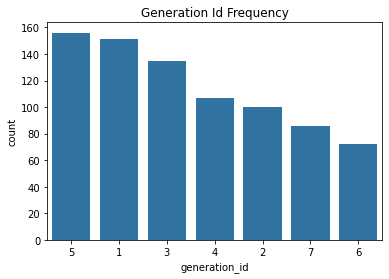

In [15]:
# plot the bar chart from largest to smallest frequency of generation_id
sb.countplot(data=pokemon, x='generation_id', color=base_color, order=gen_order);
plt.title('Generation Id Frequency');

### Horizontal bar plot
Plot a bar graph of pokemon type1

Text(0.5, 1.0, 'Type_1 Counts')

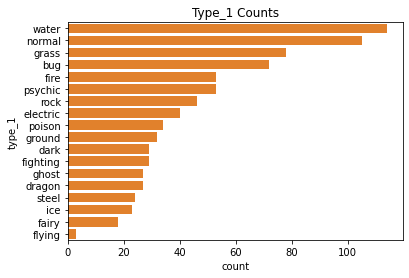

In [22]:
# choose a base color
base_color = sb.color_palette()[1]

# order counts from largest to smallest
type1_order = pokemon['type_1'].value_counts().index

# plot the absolute bar chart
sb.countplot(data=pokemon, y='type_1', color=base_color, order=type1_order);
plt.title('Type_1 Counts')

### Rotating X ticks

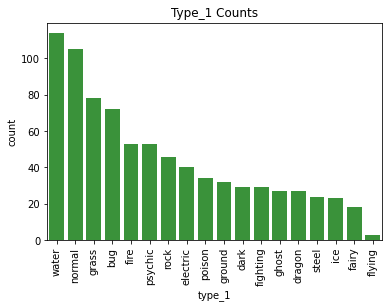

In [23]:
# choose a base color
base_color = sb.color_palette()[2]

# order counts from largest to smallest
type1_order = pokemon['type_1'].value_counts().index

# plot the absolute bar chart
sb.countplot(data=pokemon, x='type_1', color=base_color, order=type1_order);
plt.xticks(rotation=90);
plt.title('Type_1 Counts');

## Relative Frequency

What proportion of the data falls in each category. One method of plotting the data in terms of relative frequency on a bar chart is to just relabel the count's axis in terms of proportions. The underlying data will be the same, it will simply be the scale of the axis ticks that will be changed.

Wrangle the data to have both type_1 and type_2 on the same column

In [25]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [29]:
# melt the two columns
# id_vars > columns to use as identifier variables
# value_vars > columns to unpivot
# var_name > name to use for the variable column
# value_name > name to use for the values column
pkmn_types = pokemon.melt(id_vars=['id', 'species'],
                            value_vars=['type_1', 'type_2'],
                            var_name='type_level',
                            value_name='type').dropna()

In [30]:
pkmn_types.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 0 to 1612
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1212 non-null   int64 
 1   species     1212 non-null   object
 2   type_level  1212 non-null   object
 3   type        1212 non-null   object
dtypes: int64(1), object(3)
memory usage: 47.3+ KB


Counts of pokemon in each type

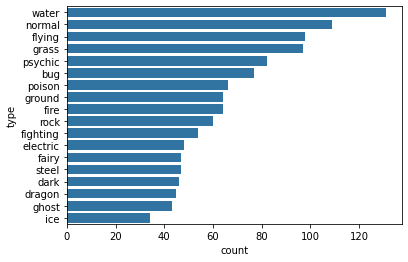

In [31]:
# plot absolute freq of types 
base_color = sb.color_palette()[0]
type_order = pkmn_types.type.value_counts().index
sb.countplot(data=pkmn_types, y='type', color = base_color, order = type_order);

Use matplotlib to change the tick counts from absolute counts to relative counts. Create a list of tick positions. Start by computing the length of the longest bar in terms of proportions.  Pokemon dataframe gives denominator while we use value counts to get the numerator

In [35]:
type_counts = pkmn_types.type.value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [33]:
# denominator
n_pokemon= pkmn_types['type'].value_counts().sum()
n_pokemon

1212

In [36]:
# highest frequency
max_type_count = type_counts[0]
max_type_count

131

In [37]:
# length of the longest bar
max_prop = max_type_count/n_pokemon
max_prop

0.10808580858085809

In [38]:
# Create an array of evenly spaced proportion values
# Use numpy.arange() function to produce a set of evenly spaced proportioned values 
# between 0 and max_prop, with a step size 2\%

tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

In [39]:
# Use a list comprehension to create tick_names that we will apply to the tick labels. 
# Pick each element `v` from the `tick_props`, and convert it into a formatted string.
# `{:0.2f}` denotes that before formatting, we 2 digits of precision and `f` is used to represent floating point number.
# Refer [here](https://docs.python.org/2/library/string.html#format-string-syntax) for more details
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

The xticks and yticks functions aren't only about rotating the tick labels. You can also get and set their locations and labels as well. 

The first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts. 

The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.

I've also added a ylabel call to make it clear that we're no longer working with straight counts.

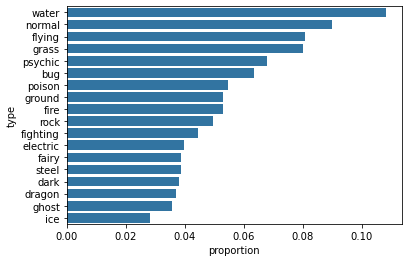

In [40]:
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

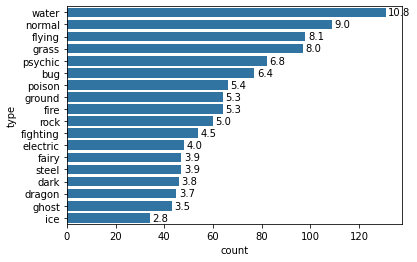

In [41]:
# Considering the same chart from the Example 1 above, print the text (proportion) on the bars
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y='type', color=base_color, order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_counts[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)
    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

## Missing data

In [43]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [44]:
sales_data.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [45]:
sales_data.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [46]:
sales_data.shape

(8190, 12)

In [47]:
# subset columns with missing data
na_counts = sales_data.drop(['Store','Date','Temperature','Fuel_Price','IsHoliday'], axis=1).isna().sum()
na_counts

MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
dtype: int64

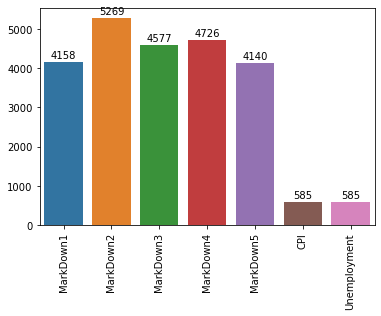

In [53]:
# plot a bar chart
# The first argument to the function below contains the x-values (column names), 
# the second argument the y-values (our counts).
# Refer to the syntax and more example here - https://seaborn.pydata.org/generated/seaborn.barplot.html
sb.barplot(x=na_counts.index.values, y=na_counts);
plt.xticks(rotation=90);

# logic to print value on each bar
for i in range(na_counts.shape[0]):
    count=na_counts[i]
    # Refer here for details of the text() - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html
    # ha > horizontal allignment
    # va > vertical allignment
    plt.text(i, count+300, count, ha = 'center', va='top')

**Note** - The seaborn.barplot( ) is a useful function to keep in mind if your data is summarized and you still want to build a bar chart. If your data is not yet summarized, however, just use the countplot function so that you don't need to do extra summarization work. Barplot's main purpose is in adaptations of univariate plots for plotting bivariate data.

practice

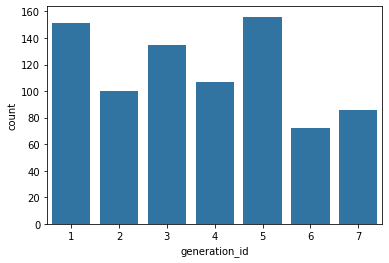

In [57]:
def bar_chart_solution_1():
  # data setup
    pokemon = pd.read_csv('../1. Data Files/pokemon.csv')
    base_color = sb.color_palette()[0]
    sb.countplot(data = pokemon, x = 'generation_id', color = base_color)

bar_chart_solution_1()

The frequency of each type is:
 type_1    807
type_2    405
Name: type_level, dtype: int64


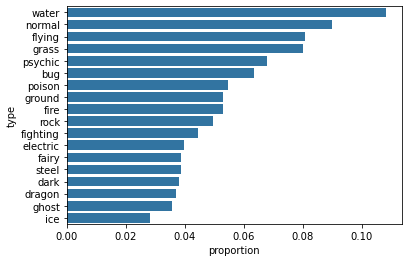

In [59]:
def bar_chart_solution_2():
   # data setup
    pokemon = pd.read_csv('../1. Data Files/pokemon.csv')
    pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
    # Display the frequency of each type.
    print('The frequency of each type is:\n', pkmn_types['type_level'].value_counts())
    # get order of bars by frequency
    type_counts = pkmn_types['type'].value_counts()
    type_order = type_counts.index
    # Compute largest proportion
    # Returns the sum of all not-null values in `type` column
    n_pokemon = pkmn_types['type'].value_counts().sum()
    max_type_count = type_counts[0]
    max_prop = max_type_count / n_pokemon
    # establish tick locations and create plot
    base_color = sb.color_palette()[0]
    tick_props = np.arange(0, max_prop, 0.02)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]
    base_color = sb.color_palette()[0]
    sb.countplot(data = pkmn_types, y = 'type', color = base_color, order = type_order)
    plt.xticks(tick_props * n_pokemon, tick_names)
    plt.xlabel('proportion')

bar_chart_solution_2()